In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Region_Mobility_Report_CSVs/2021_US_Region_Mobility_Report.csv')

In [3]:
df_states = df[ df['sub_region_2'].isnull() ]

In [4]:
state_agg = df_states.groupby('sub_region_1').mean().reset_index()

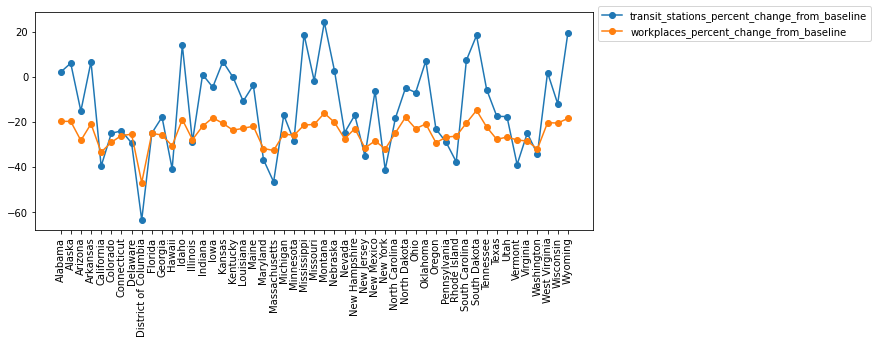

In [5]:
fig, ax = plt.subplots( figsize = (10,4))
property_list = [
#     'retail_and_recreation_percent_change_from_baseline',\
#        'grocery_and_pharmacy_percent_change_from_baseline',\
#        'parks_percent_change_from_baseline',\
       'transit_stations_percent_change_from_baseline',\
       'workplaces_percent_change_from_baseline',\
#        'residential_percent_change_from_baseline'\
                ]
for proper in property_list:
    ax.plot( state_agg['sub_region_1'], state_agg[proper], label = proper, marker = 'o')

x = range( len(state_agg['sub_region_1']) )
labels = state_agg['sub_region_1']
ax.tick_params(axis='x', rotation=90)
ax.legend(bbox_to_anchor=(1, 1.05))

In [6]:
df_grouped = df.groupby('place_id').mean()

In [7]:
shape_path='data/shp/USA_shape.shp'

In [8]:
usa = gpd.read_file(shape_path)

In [9]:
usa_cont=usa[(usa.NAME != 'Alaska') & (usa.NAME !='Hawaii') & (usa.NAME != 'Puerto Rico')]

In [10]:
state_agg = state_agg.rename(columns={"sub_region_1": "NAME"})

<AxesSubplot:>

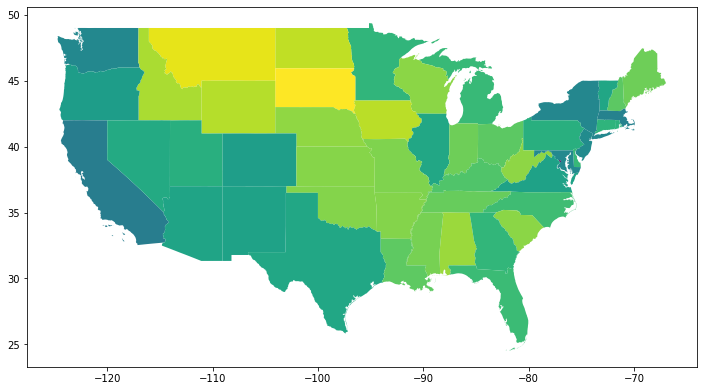

In [11]:
fig , ax = plt.subplots(figsize=(12,7))
usa_state_data = usa_cont.merge(state_agg)
# usa_state_data.plot(ax = ax, facecolor="#FFFFFF", hatch="//")
usa_state_data.plot(ax = ax , column = 'workplaces_percent_change_from_baseline')

# hatches = ["\\\\","++", "XX"]
# state_name = ['Texas', 'California', "Belgium"]
# hatchdic = dict(zip(state_name, hatches))

# for info, shape in zip(usa_state_data.NAME, m.shf):
#     if info['NAME'] in countries:
#         p= Polygon(np.array(shape), fill=False, hatch=hatchdic[info['NAME']])
#         shapes.update({info['NAME'] : p})